In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import peptide
import matplotlib.patheffects as pe
import itertools

In [2]:
amino_acid_masses = {
    "A": 71.03711,   # Alanine
    "R": 156.10111,  # Arginine
    "N": 114.04293,  # Asparagine
    "D": 115.02694,  # Aspartic acid
    "C": 103.00919,  # Cysteine
    "E": 129.04259,  # Glutamic acid
    "Q": 128.05858,  # Glutamine
    "G": 57.02146,   # Glycine
    "H": 137.05891,  # Histidine
    "(I/L)": 113.08406,  # Isoleucine
    #"L": 113.08406,  # Leucine
    "K": 128.09496,  # Lysine
    "M": 131.04049,  # Methionine
    "F": 147.06841,  # Phenylalanine
    "P": 97.05276,   # Proline
    "S": 87.03203,   # Serine
    "T": 101.04768,  # Threonine
    "W": 186.07931,  # Tryptophan
    "Y": 163.06333,  # Tyrosine
    "V": 99.06841,    # Valine
    "R(Me)": 156.10111 + 14.01565,  # Methylated Arginine
}


In [135]:
amino_acid_masses_value = {value: key for key, value in amino_acid_masses.items()}
amino_acid_masses_value

{71.03711: 'A',
 156.10111: 'R',
 114.04293: 'N',
 115.02694: 'D',
 103.00919: 'C',
 129.04259: 'E',
 128.05858: 'Q',
 57.02146: 'G',
 137.05891: 'H',
 113.08406: '(I/L)',
 128.09496: 'K',
 131.04049: 'M',
 147.06841: 'F',
 97.05276: 'P',
 87.03203: 'S',
 101.04768: 'T',
 186.07931: 'W',
 163.06333: 'Y',
 99.06841: 'V',
 170.11676: 'R(Me)'}

In [3]:
ptm_masses = {
    "Me": 14.01565,  
    'Me2': 28.0313,
    }

In [4]:
def decode_ideal_spec(data, tolerance=0.5):
    data = [0] + data
    graph = {}
    for i in range(len(data) - 1):
        each_start = data[i]
        for j in range(i + 1, len(data)):
            the_difference = data[j] - each_start
            for eahc_pep in amino_acid_masses:
                if the_difference <= amino_acid_masses[eahc_pep] + tolerance and the_difference >= amino_acid_masses[eahc_pep] - tolerance:
                    #print(data[i], '->', data[j], ':', eahc_pep)
                    if data[i] in graph:
                        graph[data[i]].append((data[j], eahc_pep))
                    else:
                        graph[data[i]] = [(data[j], eahc_pep)]
                    break
    return graph

In [5]:
def get_paths(graph, start):
    paths = []

    def dfs(node, path):
        if node not in graph or not graph[node]:
            # No outgoing edges → path ends here
            paths.append(path)
            return
        for nxt, label in graph[node]:
            dfs(nxt, path + [label])

    dfs(start, [])
    return paths

def ideal_spec(the_aa_array):
    result = []
    for i in range(len(the_aa_array) + 1):
        current_array = the_aa_array[:i]
        the_number = 0
        for j in current_array:
            the_number += j.get_mass()
        result.append(the_number)
    for i in range(1, len(the_aa_array)):
        current_array = the_aa_array[i:]
        the_number = 0
        for j in current_array:
            the_number += j.get_mass()
        result.append(the_number)
    result.sort()
    return result


def DecodingIdealSpectrum(spectrum):
    graph = decode_ideal_spec(spectrum)
    #print(graph)
    all_pathes = get_paths(graph, 0)
    #print(all_pathes)
    all_pathes = [''.join(p) for p in all_pathes]
    #print(all_pathes)
    for i in all_pathes:
        #print(ideal_spec(i))
        if ideal_spec(i)[1:] == spectrum:
            return i

In [6]:
the_pep = peptide.Pep("[GGNFSGR(Me)GGFGGSR+2H]2+")
the_pep.AA_array

[G, G, N, F, S, G, R(Me), G, G, F, G, G, S, R]

In [7]:
ideal_spec(the_pep.AA_array)

[0,
 57.02146,
 114.04292,
 156.10111,
 228.08585,
 243.13314000000003,
 300.1546,
 357.17606,
 375.15426,
 462.18629000000004,
 504.24447000000004,
 519.20775,
 561.26593,
 618.28739,
 689.32451,
 746.3459700000001,
 788.4041499999998,
 803.3674300000001,
 845.42561,
 932.4576400000001,
 950.4358400000001,
 1007.4573000000001,
 1064.4787600000002,
 1079.5260500000002,
 1151.5107900000003,
 1193.5689800000002,
 1250.5904400000002,
 1307.6119000000003]

In [8]:
df = pd.read_csv('data/data_table/data_sheet1.csv')
conserve_line_df = df[(df['m1+m2']< 1327+1) & (df['m1+m2']> 1327-1)]

In [9]:
conserve_line_list = list(conserve_line_df['mass1']) + list(conserve_line_df['mass2'])

In [10]:
conserve_line_list.sort()
conserve_line_list

[318.85,
 505.13,
 523.26,
 580.39,
 637.39,
 690.36,
 747.43,
 804.37,
 822.35,
 1008.58]

In [11]:
def decode_ideal_spec_print(data, tolerance=0.8):
    data = [0] + data
    graph = {}
    for i in range(len(data) - 1):
        each_start = data[i]
        for j in range(i + 1, len(data)):
            the_difference = data[j] - each_start
            for eahc_pep in amino_acid_masses:
                if the_difference <= amino_acid_masses[eahc_pep] + tolerance and the_difference >= amino_acid_masses[eahc_pep] - tolerance:
                    print(data[i], '->', data[j], ':', eahc_pep)

In [12]:
graph_data = decode_ideal_spec(conserve_line_list)

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_90422/2241967387.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


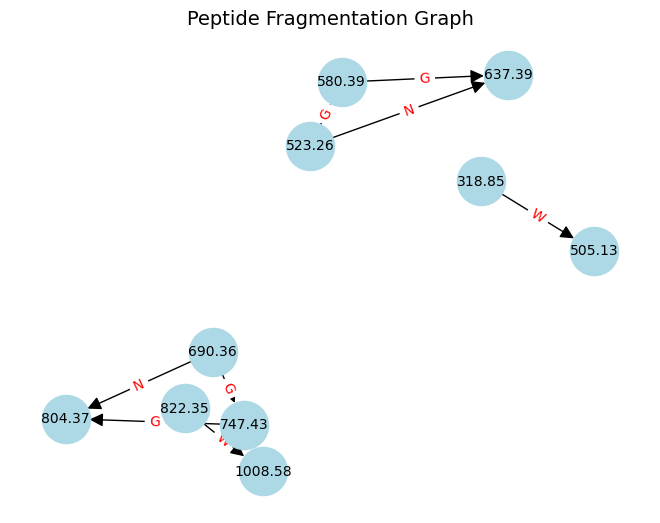

In [13]:
import networkx as nx
# Create a directed graph
G = nx.DiGraph()

# Add edges with labels
for src, targets in graph_data.items():
    for dst, label in targets:
        G.add_edge(src, dst, label=label)

# Choose layout (spring_layout = general, shell_layout = ordered)
pos = nx.spring_layout(G, seed=42, k=0.6)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1200, font_size=10, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'), font_color='red')

# Optional: Adjust margins and title
plt.title("Peptide Fragmentation Graph", fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
from collections import defaultdict
from typing import Dict, List, Tuple, Any, Set

Adj = Dict[Any, List[Tuple[Any, Any]]]

def all_paths(adj: Adj):
    """
    Enumerate all simple paths in a directed graph represented as:
        { node: [(neighbor, edge_label), ...], ... }

    Returns: List of dicts with:
        - 'nodes': [n0, n1, ..., nk]
        - 'edges': [(n0, n1, label01), (n1, n2, label12), ...]
    Handles:
        - Disconnected components
        - Nodes with no outgoing edges (isolated or sinks)
        - Cycles (won't revisit a node already in the current path)
    """
    # Collect all nodes (appear as keys or neighbors)
    nodes: Set[Any] = set(adj.keys())
    for u, outs in adj.items():
        for v, _lbl in outs:
            nodes.add(v)

    # Normalize: ensure every node exists as a key
    norm_adj: Adj = {u: list(adj.get(u, [])) for u in nodes}

    # Compute in-degrees to find sources (roots of components)
    indeg = defaultdict(int)
    for u, outs in norm_adj.items():
        for v, _lbl in outs:
            indeg[v] += 1
    sources = [u for u in nodes if indeg[u] == 0]

    # If there are cycles that make every node have indegree>0,
    # fall back to starting from every node (we still avoid revisits).
    if not sources:
        sources = list(nodes)

    out_paths = []

    def dfs(u, visited, node_path, edge_path):
        visited.add(u)
        node_path.append(u)

        # If u has no outgoing edges OR all neighbors are already visited -> treat as leaf
        outs = norm_adj.get(u, [])
        advanced = False
        for v, lbl in outs:
            if v not in visited:
                advanced = True
                edge_path.append((u, v, lbl))
                dfs(v, visited, node_path, edge_path)
                edge_path.pop()
        if not advanced:
            # Reached a sink (or all next steps would revisit): record path
            out_paths.append({
                'nodes': list(node_path),
                'edges': list(edge_path),
            })

        node_path.pop()
        visited.remove(u)

    # Also account for isolated nodes (no in, no out) — they’ll be included via sources
    for s in sources:
        dfs(s, set(), [], [])

    # Deduplicate paths in case multiple starts hit the same leaf (rare but possible).
    # We’ll dedupe by (tuple(nodes), tuple(edges))
    seen = set()
    unique = []
    for p in out_paths:
        key = (tuple(p['nodes']), tuple(p['edges']))
        if key not in seen:
            seen.add(key)
            unique.append(p)
    return unique



In [15]:
all_paths(graph_data)

[{'nodes': [523.26, 580.39, 637.39],
  'edges': [(523.26, 580.39, 'G'), (580.39, 637.39, 'G')]},
 {'nodes': [523.26, 637.39], 'edges': [(523.26, 637.39, 'N')]},
 {'nodes': [690.36, 747.43, 804.37],
  'edges': [(690.36, 747.43, 'G'), (747.43, 804.37, 'G')]},
 {'nodes': [690.36, 804.37], 'edges': [(690.36, 804.37, 'N')]},
 {'nodes': [822.35, 1008.58], 'edges': [(822.35, 1008.58, 'W')]},
 {'nodes': [318.85, 505.13], 'edges': [(318.85, 505.13, 'W')]}]

In [16]:
from collections import Counter
from math import gcd
from functools import reduce
from typing import List

def permutations_sum(nums: List[int], target: int) -> List[List[int]]:
    """
    Return all unique permutations drawn from nums (each value used ≤ its count)
    whose elements sum to target. Assumes all numbers are non-negative.
    """
    # Remove zeros (they cause infinite branching; also don't help reach a positive target)
    nums = [x for x in nums if x > 0]
    counts = Counter(nums)
    uniq = sorted(counts)  # ascending for early pruning
    res: List[List[int]] = []

    # Necessary (cheap) pruning: if gcd of all values doesn't divide target, no solutions
    if not uniq:
        return [[]] if target == 0 else []
    g = reduce(gcd, uniq)
    if target % g != 0:
        return []

    def dfs(remain: int, path: List[int]) -> None:
        if remain == 0:
            res.append(path.copy())
            return
        # try each available value (order matters => try all)
        for v in uniq:
            if counts[v] == 0: 
                continue
            if v > remain:      # prune (nums are non-negative & sorted)
                break
            counts[v] -= 1
            path.append(v)
            dfs(remain - v, path)
            path.pop()
            counts[v] += 1

    dfs(target, [])
    return res

# Variant: unlimited reuse of candidates (ignore input multiplicities)
def permutations_sum_unlimited(nums: List[int], target: int) -> List[List[int]]:
    nums = sorted({x for x in nums if x > 0})
    if not nums:
        return [[]] if target == 0 else []
    g = reduce(gcd, nums)
    if target % g != 0:
        return []
    res: List[List[int]] = []

    def dfs(remain: int, path: List[int]) -> None:
        if remain == 0:
            res.append(path.copy())
            return
        for v in nums:
            if v > remain:
                break
            path.append(v)
            dfs(remain - v, path)
            path.pop()

    dfs(target, [])
    return res

In [35]:

def permutations_sum_unlimited(nums: List[int], target: int, tolerance: int = 0) -> List[List[int]]:
    """
    Enumerate all order-sensitive sequences made from positive values in `nums` (unlimited reuse)
    whose sum is within [target - tolerance, target + tolerance], inclusive.

    Notes:
    - Ignores non-positives to guarantee finiteness.
    - Uses a gcd reachability check to quickly return [] when no sum in the window is reachable.
    """
    if tolerance < 0:
        raise ValueError("tolerance must be >= 0")

    vals = sorted({x for x in nums if x > 0})
    lo = max(0, target - tolerance)
    hi = target + tolerance
    res: List[List[int]] = []

    if not vals:
        return [[]] if lo <= 0 <= hi else []

    # Reachability: sums are multiples of gcd(vals). If no multiple lies in [lo, hi], no solutions.
    g = reduce(gcd, vals)
    first_multiple = ((lo + g - 1) // g) * g
    if first_multiple > hi:
        return []

    def dfs(cur_sum: int, path: List[int]) -> None:
        if lo <= cur_sum <= hi:
            res.append(path.copy())
            # don't return here; longer sequences may still be valid until cur_sum > hi
        if cur_sum >= hi:
            return
        for v in vals:
            nv = cur_sum + v
            if nv > hi:
                break
            path.append(v)
            dfs(nv, path)
            path.pop()

    dfs(0, [])
    return res

In [45]:
from typing import Dict, List, Tuple
from math import gcd
from functools import reduce
from decimal import Decimal, ROUND_HALF_UP, getcontext

def permutations_sum_unlimited_keys_quantized(weights: Dict[str, float],
                                              target: float,
                                              tolerance: float = 0.0,
                                              decimals: int = 3) -> List[List[str]]:
    """
    Quantize to integers by scaling by 10**decimals; then enumerate with gcd pruning.
    """
    if tolerance < 0:
        raise ValueError("tolerance must be >= 0")
    if decimals < 0:
        raise ValueError("decimals must be >= 0")

    getcontext().prec = max(28, decimals + 6)
    S = Decimal(10) ** decimals

    def q(x: float) -> int:
        return int((Decimal(str(x)) * S).to_integral_value(rounding=ROUND_HALF_UP))

    items_i: List[Tuple[str, int]] = sorted(
        ((k, q(v)) for k, v in weights.items() if v > 0.0),
        key=lambda kv: kv[1]
    )
    lo_i = max(0, q(target - tolerance))
    hi_i = q(target + tolerance)

    # if quantization zeroed something, drop it; if none left, handle edge case
    items_i = [(k, w) for k, w in items_i if w > 0]
    if not items_i:
        return [[]] if 0 <= hi_i and lo_i <= 0 else []

    # gcd reachability check
    uniq_vals = sorted({w for _, w in items_i})
    g = reduce(gcd, uniq_vals)
    first_multiple = ((lo_i + g - 1) // g) * g
    if first_multiple > hi_i:
        return []

    res: List[List[str]] = []

    def dfs(cur: int, path: List[str]) -> None:
        if lo_i <= cur <= hi_i:
            res.append(path.copy())
        if cur + items_i[0][1] > hi_i:
            return
        for k, w in items_i:
            nv = cur + w
            if nv > hi_i:
                break
            path.append(k)
            dfs(nv, path)
            path.pop()

    dfs(0, [])
    return res

In [46]:
a = permutations_sum_unlimited([2,3,5], 10, 1)
# -> [[3,5], [5,3], [3,3,2], [3,2,3], [2,3,3]]

In [50]:
len(permutations_sum_unlimited_keys_quantized(amino_acid_masses, 700, tolerance=0.5, decimals=3))

3660383

In [27]:
a_len = [len(i) for i in a]

In [28]:
np.array(a_len).mean()

np.float64(10.678096083153758)

In [30]:
len(a)

15778

In [33]:
def find_all_paths(graph):
    """
    Finds all possible paths in a directed graph.

    This function traverses a graph represented by an adjacency list to find
    all possible paths from a starting node to a terminal node (a node with
    no outgoing edges).

    Args:
        graph: A dictionary where keys are starting nodes and values are lists
               of tuples. Each tuple contains a destination node and an
               annotation (edge label).
               Example: {node1: [(node2, 'A'), (node3, 'B')]}

    Returns:
        A list of strings, where each string represents a unique path in the
        format "(start_node)annotations(end_node)".
    """
    all_paths = []

    def dfs(start_node, current_node, accumulated_annotes):
        """
        A recursive helper function to perform a Depth-First Search.

        Args:
            start_node: The original starting node of the path.
            current_node: The node currently being visited.
            accumulated_annotes: The concatenated string of annotations for the
                                 path traversed so far.
        """
        # A terminal node is one that does not have any outgoing edges,
        # meaning it won't be a key in the graph dictionary.
        if current_node not in graph:
            # We have reached the end of a path. Format and save it.
            path_string = f"({start_node}){accumulated_annotes}({current_node})"
            all_paths.append(path_string)
            return

        # If the current node is not a terminal node, continue to its neighbors.
        for next_node, annote in graph[current_node]:
            # Recursively call dfs for each neighbor, appending the new annotation.
            dfs(start_node, next_node, accumulated_annotes + annote)

    # Iterate through each node in the graph dictionary as a potential starting point.
    for node in graph:
        # Begin the DFS for each of its direct neighbors.
        for neighbor, first_annote in graph[node]:
            dfs(start_node=node, current_node=neighbor, accumulated_annotes=first_annote)

    return all_paths

# --- Example Usage ---
if __name__ == "__main__":
    # The example graph provided in the problem description
    example_graph = graph_data
    
    
    # Find all the paths in the graph
    paths = find_all_paths(example_graph)

    # Print the results
    print("Found the following paths:")
    for path in paths:
        print(path)

Found the following paths:
(318.85)W(505.13)
(523.26)GG(637.39)
(523.26)N(637.39)
(580.39)G(637.39)
(690.36)GG(804.37)
(690.36)N(804.37)
(747.43)G(804.37)
(822.35)W(1008.58)


In [34]:
graph_data

{318.85: [(505.13, 'W')],
 523.26: [(580.39, 'G'), (637.39, 'N')],
 580.39: [(637.39, 'G')],
 690.36: [(747.43, 'G'), (804.37, 'N')],
 747.43: [(804.37, 'G')],
 822.35: [(1008.58, 'W')]}

In [66]:
after_array = permutations_sum_unlimited_keys_quantized(amino_acid_masses, 1307.6119000000003 - 804.37, tolerance=0.5, decimals=3)
before_array = permutations_sum_unlimited_keys_quantized(amino_acid_masses, 690.36, tolerance=0.5, decimals=3)

In [61]:
mass = 0

length = len(the_pep.AA_array)

for i in range(length):

    mass += the_pep.AA_array[i].get_mass()
    print(the_pep.AA_array[i])
mass

G
G
N
F
S
G
R(Me)
G
G
F
G
G
S
R


1307.6119000000003

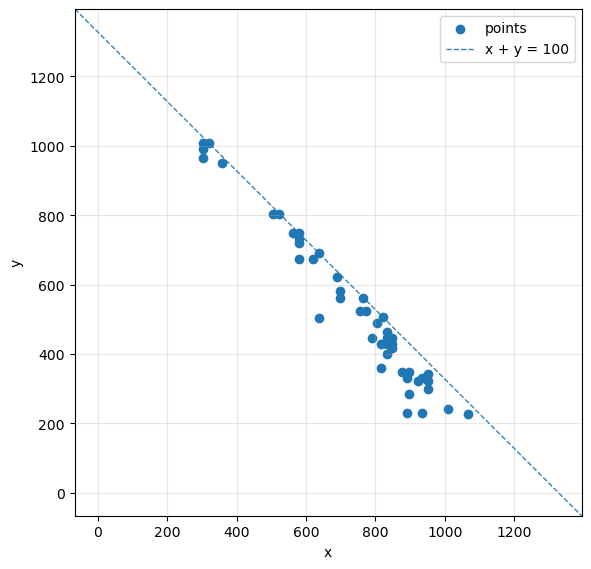

In [ ]:

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(df['correct_mass1'], df['correct_mass2'], label="points")

# Option A (Matplotlib ≥ 3.3): infinite line with slope 1 through origin
ax.axline((0, 1327.64), (1327.64, 0), linestyle='--', linewidth=1, alpha=0.9, label="x + y = 1327.64")

# Option B (works everywhere): line across current plot limits
# lims = np.array([ax.get_xlim(), ax.get_ylim()])
# low, high = lims.min(), lims.max()
# ax.plot([low, high], [low, high], '--', linewidth=1, alpha=0.8, label="y = x")
# ax.set_xlim(low, high); ax.set_ylim(low, high)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect('equal', adjustable='box')  # keeps y=x at 45°
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

In [77]:
df['ion'] = df['ion1'] +df['ion2']

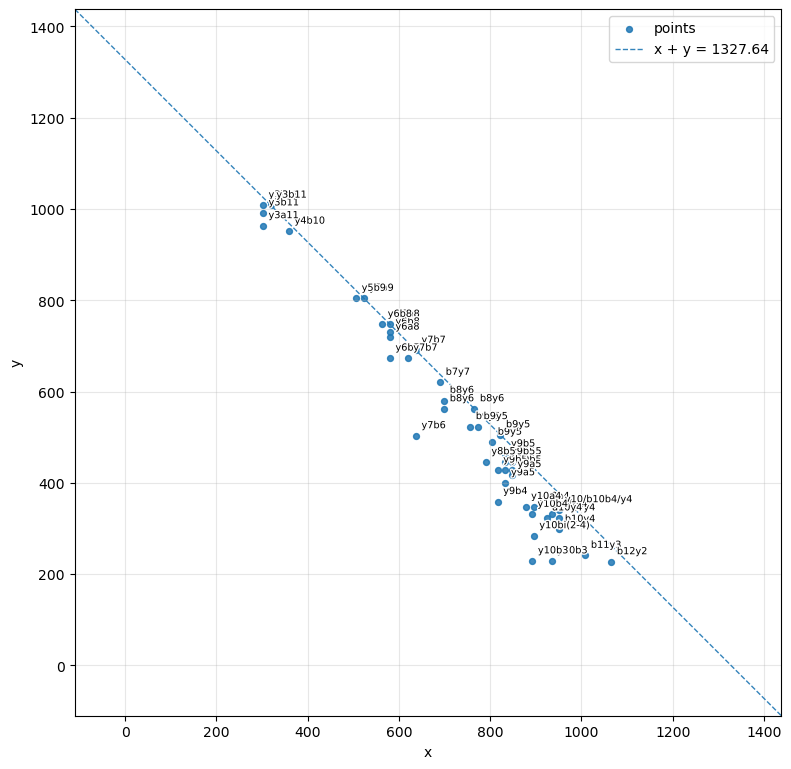

In [81]:
c = 1327.64  # the constant in x + y = c

fig, ax = plt.subplots(figsize=(8, 8))  # larger plot
ax.scatter(
    df['correct_mass1'], df['correct_mass2'],
    s=18, alpha=0.85, label="points"       # smaller dots
)

# x + y = c
ax.axline((0, c), (c, 0), linestyle='--', linewidth=1, alpha=0.9, label=f"x + y = {c:g}")

# add a small label for each dot (from df['ion'])
for x, y, lab in df[['correct_mass1', 'correct_mass2', 'ion']].itertuples(index=False, name=None):
    ax.annotate(
        str(lab), (x, y),
        textcoords='offset points', xytext=(4, 4), ha='left', va='bottom',
        fontsize=7,
        path_effects=[pe.withStroke(linewidth=2, foreground='white')]  # white halo for readability
    )

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect('equal', adjustable='box')
ax.grid(True, alpha=0.3)
ax.legend()

# pad axes a bit so labels aren’t clipped
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.set_xlim(xmin - 0.03*(xmax - xmin), xmax + 0.03*(xmax - xmin))
ax.set_ylim(ymin - 0.03*(ymax - ymin), ymax + 0.03*(ymax - ymin))

plt.tight_layout()
plt.show()

In [111]:
df_current = df.iloc[[0, 1, 2, 47, 35, 8, 6,4, 14]]

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


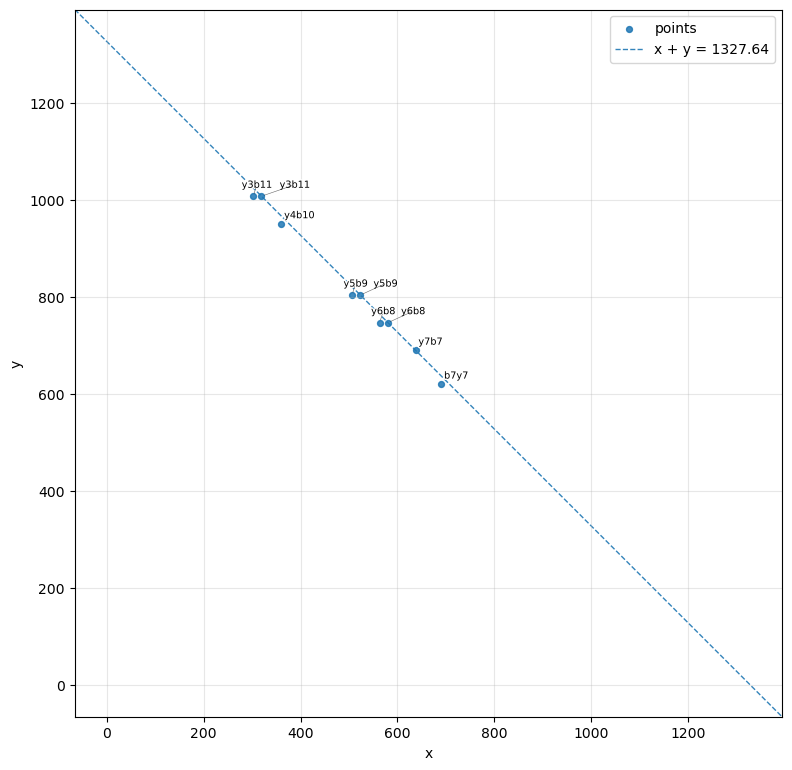

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

c = 1327.64

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_current['correct_mass1'], df_current['correct_mass2'],
           s=18, alpha=0.85, label="points", zorder=1)

# x + y = c
ax.axline((0, c), (c, 0), linestyle='--', linewidth=1, alpha=0.9,
          label=f"x + y = {c:g}", zorder=0)

# Create text objects (one per point)
texts = []
for x, y, lab in df_current[['correct_mass1','correct_mass2','ion']].itertuples(index=False, name=None):
    t = ax.text(x, y, str(lab), fontsize=7, ha='left', va='bottom',
                path_effects=[pe.withStroke(linewidth=2, foreground='white')],
                zorder=3)
    texts.append(t)

# Auto-resolve overlaps
try:
    from adjustText import adjust_text
    adjust_text(
        texts, ax=ax,
        only_move={'points':'y', 'texts':'xy'},
        expand_points=(1.2, 1.6),   # push labels away from points
        expand_text=(1.1, 1.3),     # and from each other
        force_points=(0.2, 0.5),
        force_text=(0.1, 0.3),
        arrowprops=dict(arrowstyle='-', lw=0.4, alpha=0.6)  # draw tiny leader lines if moved
    )
except ImportError:
    print("Tip: install adjustText to avoid overlaps: pip install adjustText")

ax.set_xlabel("x"); ax.set_ylabel("y")
ax.set_aspect('equal', adjustable='box')
ax.grid(True, alpha=0.3); ax.legend()
ax.margins(x=0.05, y=0.05)  # a bit more breathing room
plt.tight_layout(); plt.show()

In [112]:
df_current.loc[:,'correct_sum'] = df_current['correct_mass1'] + df_current['correct_mass2']

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_90422/1504772525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current.loc[:,'correct_sum'] = df_current['correct_mass1'] + df_current['correct_mass2']


In [113]:
df_current.loc[:,'conserve'] = df_current['correct_sum'].apply(lambda x: abs(x - 1327.64) < 1)
df_current

/var/folders/rn/8krws_b93vv3ckfsgwjhq5z80000gn/T/ipykernel_90422/3524355298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current.loc[:,'conserve'] = df_current['correct_sum'].apply(lambda x: abs(x - 1327.64) < 1)


,Unnamed: 0,each_original_data,ion1,loss1,loss_sign1,charge1,mass1,ion2,loss2,loss_sign2,...,Cluster ID eps_0.4,Cluster ID eps_0.5,Cluster ID eps_0.6,Cluster ID eps_0.7,Cluster ID eps_0.8,Cluster ID eps_0.9,Cluster ID eps_1.0,ion,correct_sum,conserve
0,1,y7 (1+) @ 637.39 & b7 (1+) @ 690.36,y7,NaN,NaN,1+,637.39,b7,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,y7b7,1327.636960,True
1,2,y6 (1+) @ 580.39 & b8 (1+) @ 747.43,y6,NaN,NaN,1+,580.39,b8,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,y6b8,1327.636960,True
2,3,y5 (1+) @ 523.26 & b9 (1+) @ 804.37,y5,NaN,NaN,1+,523.26,b9,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,y5b9,1327.636960,True
47,48,y3 (1+) @ 318.85 & b11 (1+) @ 1008.58,y3,NaN,NaN,1+,318.85,b11,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,y3b11,1327.636960,True
35,36,b7 (1+) @ 691.33 & [y7-NH3] (1+) @ 620.15,b7,NaN,NaN,1+,691.33,y7,NH3,-,...,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,b7y7,1310.610411,False
8,9,[y6-NH3] (1+) @ 562.87 & b8 (1+) @ 747.77,y6,NH3,-,1+,562.87,b8,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,y6b8,1310.610411,False
6,7,[y5-NH3] (1+) @ 506.09 & b9 (1+) @ 804.5,y5,NH3,-,1+,506.09,b9,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,y5b9,1310.610411,False
4,5,[y4-NH3] (1+) @ 359.11 & b10 (1+) @ 951.13,y4,NH3,-,1+,359.11,b10,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,y4b10,1310.610411,False
14,15,[y3-NH3] (1+) @ 301.75 & b11(1+) @ 1009.17,y3,NH3,-,1+,301.75,b11,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,y3b11,1310.610411,False


In [99]:
from collections import defaultdict
from typing import Iterable, List, Optional, Tuple

def _q(x: float, eps: float) -> int:
    """Quantize a float to an integer key with tolerance eps."""
    return int(round(x / eps))

def build_adj(points: Iterable[float],
              steps: Iterable[float],
              eps: float = 1e-6,
              forward_only: bool = True):
    """
    Build adjacency for points on a line with allowed steps.
    Returns (sorted_points, index_of_q, out_edges, in_edges).
    """
    pts = sorted(set(points))
    if not pts:
        raise ValueError("No points given.")
    q2idx = {_q(p, eps): i for i, p in enumerate(pts)}

    out_edges = [[] for _ in pts]
    in_edges  = [[] for _ in pts]

    for i, p in enumerate(pts):
        for s in steps:
            # If forward_only, only create edges that go to the right (DAG)
            if forward_only and s < 0:
                continue
            j_key = _q(p + s, eps)
            j = q2idx.get(j_key)
            if j is not None:
                if not forward_only or pts[j] >= p - eps:
                    out_edges[i].append(j)
                    in_edges[j].append(i)
    return pts, q2idx, out_edges, in_edges

def enumerate_paths(points: Iterable[float],
                    steps: Iterable[float],
                    start: float,
                    target: Optional[float] = None,
                    eps: float = 1e-6,
                    forward_only: bool = True,
                    max_paths: Optional[int] = None,
                    return_steps: bool = False) -> List[List[float]]:
    """
    Enumerate all paths over the given points, starting at `start`,
    taking steps from `steps`, landing on points each step.

    If `target` is provided: paths from start -> target.
    Else: paths from start -> every sink (point with no outgoing edges).

    Parameters
    ----------
    points : iterable of floats
    steps  : iterable of floats (allowed step lengths)
    start  : starting point (must be in points within eps)
    target : optional target point (must be in points within eps if given)
    eps    : float tolerance for matching points
    forward_only : if True, only allow edges to the right (DAG, fast DP)
    max_paths : stop after generating this many paths (None = no cap)
    return_steps : if True, return sequences of steps instead of point sequences

    Returns
    -------
    List of paths, where each path is a list of points (or steps if return_steps=True).
    """
    pts, q2idx, out_edges, in_edges = build_adj(points, steps, eps, forward_only)

    def must_have(val: float, name: str) -> int:
        k = q2idx.get(_q(val, eps))
        if k is None:
            raise ValueError(f"{name}={val} not found in `points` (within eps={eps}).")
        return k

    s_idx = must_have(start, "start")
    t_idx = must_have(target, "target") if target is not None else None

    # Fast path for DAG (forward_only): DP to count and record parents for reconstruction
    if forward_only:
        n = len(pts)
        # topo order is just ascending points
        order = list(range(n))
        ways = [0] * n
        ways[s_idx] = 1
        parents = [[] for _ in range(n)]

        for i in order:
            if ways[i] == 0:
                continue
            for j in out_edges[i]:
                if ways[i] > 0:
                    parents[j].append(i)
                    ways[j] += ways[i]

        # Decide sinks if target not specified
        targets = [t_idx] if t_idx is not None else [i for i in range(n) if not out_edges[i]]
        results: List[List[float]] = []

        def backtrack(cur: int, buf: List[int]):
            nonlocal results
            if max_paths is not None and len(results) >= max_paths:
                return
            if cur == s_idx:
                idx_path = buf + [cur]
                idx_path.reverse()
                if return_steps:
                    step_seq = [pts[idx_path[k+1]] - pts[idx_path[k]] for k in range(len(idx_path)-1)]
                    results.append(step_seq)
                else:
                    results.append([pts[k] for k in idx_path])
                return
            for p in parents[cur]:
                backtrack(p, buf + [cur])

        for tgt in targets:
            if tgt is None:
                continue
            if ways[tgt] == 0:
                continue
            backtrack(tgt, [])

        return results

    # General case (may have cycles): enumerate simple paths with DFS and visited set.
    # You can optionally add a max_hops guard if needed.
    results: List[List[float]] = []
    visited = set()

    def dfs(u: int, path: List[int]):
        nonlocal results
        if max_paths is not None and len(results) >= max_paths:
            return
        visited.add(u)
        path.append(u)

        is_target = (t_idx is not None and u == t_idx)
        is_sink = (t_idx is None and len(out_edges[u]) == 0)
        if is_target or is_sink:
            if return_steps:
                step_seq = [pts[path[k+1]] - pts[path[k]] for k in range(len(path)-1)]
                results.append(step_seq)
            else:
                results.append([pts[i] for i in path])

        for v in out_edges[u]:
            if v not in visited:
                dfs(v, path)

        path.pop()
        visited.remove(u)

    dfs(s_idx, [])
    return results

In [100]:
points = [0.0, 2.0, 3.0, 5.0, 7.0]   # points on the line
steps  = [2.0, 3.0]                  # allowed step lengths
start  = 0.0
target = 7.0

# All paths as point sequences:
paths_pts = enumerate_paths(points, steps, start, target)
# -> [[0.0, 2.0, 5.0, 7.0], [0.0, 3.0, 5.0, 7.0]]

# Or as sequences of steps:
paths_steps = enumerate_paths(points, steps, start, target, return_steps=True)
# -> [[2.0, 3.0, 2.0], [3.0, 2.0, 2.0]]

In [101]:
paths_steps

[[2.0, 3.0, 2.0], [3.0, 2.0, 2.0]]

In [102]:
from math import sqrt
from typing import Iterable, List, Optional, Tuple

def _q1(v: float, eps: float) -> int:
    """Quantize a float to an integer key with tolerance eps."""
    return int(round(v / eps))

def _q2(x: float, y: float, eps: float) -> Tuple[int, int]:
    return _q1(x, eps), _q1(y, eps)

def build_adj_2d(points_xy: Iterable[Tuple[float, float]],
                 steps: Iterable[float],
                 line_sum: Optional[float] = None,
                 eps: float = 1e-6,
                 forward_only: bool = True):
    """
    Build adjacency on points lying on x+y ~= a using Euclidean step lengths.
    Returns (pts, q2idx, out_edges, in_edges, a_est).
    """
    pts = sorted(set((float(x), float(y)) for x, y in points_xy), key=lambda p: (p[0], -p[1]))
    if not pts:
        raise ValueError("No points given.")
    # Estimate 'a' if not provided, and sanity-check colinearity
    a_vals = [x + y for x, y in pts]
    a_est = sum(a_vals) / len(a_vals) if line_sum is None else float(line_sum)
    for (x, y) in pts:
        if abs((x + y) - a_est) > 5 * eps:
            raise ValueError(f"Point {(x, y)} is not on x+y≈{a_est} within tolerance.")
    q2idx = {_q2(x, y, eps): i for i, (x, y) in enumerate(pts)}

    # Convert step lengths (Euclidean) to Δx along the line (Δy = -Δx)
    # s >= 0 means a geometric distance; negative steps (if supplied) are respected as direction.
    dxs_raw = []
    for s in steps:
        s = float(s)
        if s == 0:
            continue
        dx = s / sqrt(2.0)
        dxs_raw.append(dx)

    out_edges = [[] for _ in pts]
    in_edges  = [[] for _ in pts]

    # Helper: add edge if destination exists
    def try_edge(i: int, dx: float):
        x, y = pts[i]
        if forward_only and dx < -eps:
            return
        x2, y2 = x + dx, y - dx  # stays on x+y=a
        j = q2idx.get(_q2(x2, y2, eps))
        if j is not None:
            out_edges[i].append(j)
            in_edges[j].append(i)

    for i in range(len(pts)):
        if forward_only:
            # Only use the given dxs (assume caller supplies positive s for forward),
            # but allow tiny negative from rounding
            for dx in dxs_raw:
                try_edge(i, dx)
        else:
            # Both directions for each geometric step length
            for dx in dxs_raw:
                try_edge(i, dx)
                try_edge(i, -dx)

    return pts, q2idx, out_edges, in_edges, a_est

def enumerate_paths_2d(points_xy: Iterable[Tuple[float, float]],
                       steps: Iterable[float],
                       start: Tuple[float, float],
                       target: Optional[Tuple[float, float]] = None,
                       line_sum: Optional[float] = None,
                       eps: float = 1e-6,
                       forward_only: bool = True,
                       max_paths: Optional[int] = None,
                       return_steps: bool = False) -> List[List[Tuple[float, float]]]:
    """
    Enumerate all paths over 2D points lying on x+y=a, taking Euclidean step lengths in `steps`.
    If `target` is provided: start -> target. Else: start -> all sinks (no outgoing edges).

    Parameters
    ----------
    points_xy   : iterable of (x, y) floats (must satisfy x+y≈a)
    steps       : iterable of allowed Euclidean step lengths (floats)
    start       : (x, y) start point (must be in points within eps)
    target      : optional (x, y) target point (must be in points within eps if given)
    line_sum    : optional 'a' in x+y=a; if None, estimated from data
    eps         : coordinate tolerance for matching points (also used in line check)
    forward_only: if True, only allow edges with increasing x (DAG, fast DP)
    max_paths   : cap on number of paths to reconstruct (None = no cap)
    return_steps: if True, return sequences of Euclidean step lengths instead of points

    Returns
    -------
    List of paths; each path is a list of (x, y) points (or list of step lengths if return_steps=True).
    """
    pts, q2idx, out_edges, in_edges, a_est = build_adj_2d(
        points_xy, steps, line_sum=line_sum, eps=eps, forward_only=forward_only
    )

    def must_have_xy(p: Tuple[float, float], name: str) -> int:
        k = q2idx.get(_q2(p[0], p[1], eps))
        if k is None:
            raise ValueError(f"{name}={p} not found in points (within eps={eps}).")
        return k

    s_idx = must_have_xy(start, "start")
    t_idx = must_have_xy(target, "target") if target is not None else None

    # If forward_only, we can DP (topo order by increasing x)
    if forward_only:
        n = len(pts)
        order = list(range(n))  # already sorted by x asc
        ways = [0] * n
        ways[s_idx] = 1
        parents = [[] for _ in range(n)]

        for i in order:
            if ways[i] == 0:
                continue
            for j in out_edges[i]:
                parents[j].append(i)
                ways[j] += ways[i]

        targets = [t_idx] if t_idx is not None else [i for i in range(n) if not out_edges[i]]
        results: List = []

        def backtrack(cur: int, buf: List[int]):
            if max_paths is not None and len(results) >= max_paths:
                return
            if cur == s_idx:
                idx_path = buf + [cur]
                idx_path.reverse()
                if return_steps:
                    # Euclidean step lengths between successive points
                    step_seq = []
                    for k in range(len(idx_path) - 1):
                        x1, y1 = pts[idx_path[k]]
                        x2, y2 = pts[idx_path[k + 1]]
                        # On the line, distance is sqrt(2)*|Δx|
                        step_seq.append(abs(x2 - x1) * sqrt(2.0))
                    results.append(step_seq)
                else:
                    results.append([pts[k] for k in idx_path])
                return
            for p in parents[cur]:
                backtrack(p, buf + [cur])

        for tgt in targets:
            if tgt is None or ways[tgt] == 0:
                continue
            backtrack(tgt, [])
        return results

    # General (possibly cyclic) case: enumerate simple paths with DFS
    results: List = []
    visited = set()

    def dfs(u: int, path: List[int]):
        if max_paths is not None and len(results) >= max_paths:
            return
        visited.add(u)
        path.append(u)

        is_target = (t_idx is not None and u == t_idx)
        is_sink = (t_idx is None and len(out_edges[u]) == 0)
        if is_target or is_sink:
            if return_steps:
                step_seq = []
                for k in range(len(path) - 1):
                    x1, y1 = pts[path[k]]
                    x2, y2 = pts[path[k + 1]]
                    step_seq.append(abs(x2 - x1) * sqrt(2.0))
                results.append(step_seq)
            else:
                results.append([pts[i] for i in path])

        for v in out_edges[u]:
            if v not in visited:
                dfs(v, path)

        path.pop()
        visited.remove(u)

    dfs(s_idx, [])
    return results

In [103]:
points = [(0.0, 7.0), (2.0, 5.0), (3.0, 4.0), (5.0, 2.0), (7.0, 0.0)]  # all on x+y=7
steps  = [sqrt(2)*2, sqrt(2)*3]  # Euclidean step lengths along the line (2 and 3 units in x)
start  = (0.0, 7.0)
target = (7.0, 0.0)

paths = enumerate_paths_2d(points, steps, start, target, return_steps=False)
# -> [[(0,7),(2,5),(5,2),(7,0)], [(0,7),(3,4),(5,2),(7,0)]]

In [104]:
paths

[[(0.0, 7.0), (2.0, 5.0), (5.0, 2.0), (7.0, 0.0)],
 [(0.0, 7.0), (3.0, 4.0), (5.0, 2.0), (7.0, 0.0)]]

In [107]:
df_current[['correct_mass1', 'correct_mass2', 'conserve']]

,correct_mass1,correct_mass2,conserve
0,637.305200,690.331760,True
1,580.283740,747.353220,True
2,523.262280,804.374680,True
47,319.172410,1008.464550,True
35,690.331760,620.278651,False
8,563.257191,747.353220,False
6,506.235731,804.374680,False
4,359.167321,951.443090,False
14,302.145861,1008.464550,False
conserve,NaN,NaN,False


In [131]:
points_xy = []
for index, row in df_current.iterrows():
    #print(row['ion'])
    if row['conserve']:
        print(row['ion'])
        points_xy.append((row['correct_mass1'], row['correct_mass2']))
        print((row['correct_mass1'], row['correct_mass2']))
    else:
        print(row['ion'])
        points_xy.append((row['correct_mass1'] + 17.031, row['correct_mass2']))
        points_xy.append((row['correct_mass1'], row['correct_mass2'] + 17.031))
        print((row['correct_mass1'] + 17.031, row['correct_mass2']))
        print((row['correct_mass1'], row['correct_mass2'] + 17.031))

y7b7
(637.3052000000001, 690.33176)
y6b8
(580.2837400000001, 747.3532200000001)
y5b9
(523.26228, 804.3746800000001)
y3b11
(319.17241, 1008.46455)
b7y7
(707.36276, 620.2786508988801)
(690.33176, 637.30965089888)
y6b8
(580.28819089888, 747.3532200000001)
(563.25719089888, 764.38422)
y5b9
(523.2667308988799, 804.3746800000001)
(506.23573089888, 821.4056800000001)
y4b10
(376.19832089888, 951.44309)
(359.16732089888, 968.4740899999999)
y3b11
(319.17686089888, 1008.46455)
(302.14586089888, 1025.49555)


In [115]:
points_xy

[(637.3052000000001, 690.33176),
 (580.2837400000001, 747.3532200000001),
 (523.26228, 804.3746800000001),
 (319.17241, 1008.46455),
 (707.36276, 620.2786508988801),
 (690.33176, 637.30965089888),
 (580.28819089888, 747.3532200000001),
 (563.25719089888, 764.38422),
 (523.2667308988799, 804.3746800000001),
 (506.23573089888, 821.4056800000001),
 (376.19832089888, 951.44309),
 (359.16732089888, 968.4740899999999),
 (319.17686089888, 1008.46455),
 (302.14586089888, 1025.49555)]

In [124]:
all_values = np.array(list(amino_acid_masses.values()))
all_values = all_values * np.sqrt(2)

In [132]:
paths = enumerate_paths_2d(points_xy, all_values, (319.17241, 1008.46455), return_steps=False, eps=0.2)

In [133]:
paths

[[(319.17686089888, 1008.46455),
  (376.19832089888, 951.44309),
  (523.2667308988799, 804.3746800000001),
  (637.3052000000001, 690.33176)],
 [(319.17686089888, 1008.46455),
  (376.19832089888, 951.44309),
  (523.2667308988799, 804.3746800000001),
  (580.28819089888, 747.3532200000001),
  (637.3052000000001, 690.33176)]]

In [153]:
def track_path(the_path):
    result = []
    for i in the_path:
        each_result1 = ''
        each_result2 = ''
        for j in range(1, len(i)):
            mass = i[j][0] - i[j-1][0]
            for aa, aa_mass in amino_acid_masses.items():
                if abs(mass - aa_mass) < 0.01:
                    each_result1 += aa
                    break
        
        for j in range(len(i) - 1, 0, -1):
            mass = i[j - 1][1] - i[j][1]
            for aa, aa_mass in amino_acid_masses.items():
                if abs(mass - aa_mass) < 0.01:
                    each_result2 += aa
                    break
        each_result1 = str(i[0][0]), each_result1, str(i[-1][0])
        each_result2 = str(i[-1][1]), each_result2, str(i[0][1])
        result.append(each_result1)
        result.append(each_result2)
    
    return result
            

In [158]:
path_combined = track_path(paths)
path_combined

[('319.17686089888', 'GFN', '637.3052000000001'),
 ('690.33176', 'NFG', '1008.46455'),
 ('319.17686089888', 'GFGG', '637.3052000000001'),
 ('690.33176', 'GGFG', '1008.46455')]

In [149]:
def mass_calc(the_pep):
    mass = 0
    
    for i in the_pep:
        mass += amino_acid_masses[i]
    return mass

In [150]:
mass_calc('GFGG')

318.13279

In [166]:
def combine_arrays(arr1, arr2):
  if not isinstance(arr1, list) or not isinstance(arr2, list):
    print("Error: Both inputs must be lists.")
    return None

  # itertools.product provides the Cartesian product of input iterables.
  return list(itertools.product(arr1, arr2))

In [189]:
def permute(track_path_result, the_sum):
    track_path_result1 = float(track_path_result[0])
    track_path_result2 = float(track_path_result[2])
    permute1 = permutations_sum_unlimited_keys_quantized(amino_acid_masses, track_path_result1, tolerance=1, decimals=3)
    
    for i in range(len(permute1)):
        permute1[i] = permute1[i] + [track_path_result[1]]
    permute2 = permutations_sum_unlimited_keys_quantized(amino_acid_masses, the_sum - track_path_result2, tolerance=1, decimals=3)
    combined = combine_arrays(permute1, permute2)
    return combined

In [191]:
df2 = pd.read_csv('data/data_table/data_sheet7.csv')

In [196]:
(df2['correct_mass1'] + df2['correct_mass2']).sort_values(ascending=False)

14    1318.529326
0     1253.502780
2     1253.502780
35    1253.502780
5     1253.502780
31    1253.502780
1     1253.502780
13    1253.502780
3     1253.502780
12    1236.476231
24    1236.476231
15    1236.476231
23    1236.476231
11    1236.476231
10    1236.476231
27    1236.476231
6     1236.476231
25    1236.476231
42    1219.449682
8     1218.465666
21    1208.465631
26    1171.476171
22    1155.525884
9     1155.525884
4     1155.525884
7     1155.525884
33    1155.525884
20    1154.434370
17    1138.499335
34    1137.515320
18    1137.407821
40    1137.407821
30    1072.488770
39    1072.428890
16    1072.428890
19    1072.428890
28    1054.418325
36    1044.418290
41     966.375790
29            NaN
32            NaN
37            NaN
38            NaN
43            NaN
44            NaN
45            NaN
46            NaN
47            NaN
48            NaN
49            NaN
dtype: float64

In [197]:
mass_calc('TWT')

388.17467